# 10_R. 트위터 분석(텍스트 마이닝)

* 코난아카데미 : 데이터분석 기초
* 작성자 : 김무성

# 차례

* Extracting Tweets
* Text Cleaning
    - corpus 만들기
    - Temr-Document Matrix 구하기
* Frequent Words and Associations
    - 특정 term 찾기
    - 빈도 높은 term 찾기
    - 연관 term 찾기
    - 연관 관계 그래프로 그려보기
* Word Cloud
* Clustering
    - 계층적 클러스터링
    - K-means 클러스터링
    - k-medoids clustering
* Topic Modeling

# 추천 사이트

# 추천 자료 

# Extracting Tweets

In [153]:
options(warn=-1)

library(twitteR)

In [2]:
# download @RDataMining twwets from RDataMining.com
#http://www.rdatamining.com/data/rdmTweets.RData
# load twwets into R
load(file="10_data/twitter/rdmTweets.RData")

In [3]:
tweets <- rdmTweets

In [4]:
(n.tweet <- length(tweets))

[1] 154

In [5]:
head(tweets)

[[1]]
[1] "RDataMining: Postdoc/Research Scientist Position on Big Data at MIT http://t.co/hZ1ojAW2"

[[2]]
[1] "RDataMining: Research scientist position for privacy-preserving data publishing, Singapore http://t.co/GPA0TyG5"

[[3]]
[1] "RDataMining: Easier Parallel Computing in R with snowfall and sfCluster http://t.co/BPcinvzK"

[[4]]
[1] "RDataMining: Tutorial: Parallel computing using R package snowfall http://t.co/CHBCyr76"

[[5]]
[1] "RDataMining: handling big data: Interacting with Data using the filehash Package for R http://t.co/7RB3sChx"

[[6]]
[1] "RDataMining: Parallel Computing with R using snow and snowfall http://t.co/nxp8EZpv"


In [6]:
str(tweets[[1]])

Reference class 'status' [package "twitteR"] with 10 fields
 $ text        : chr "Postdoc/Research Scientist Position on Big Data at MIT http://t.co/hZ1ojAW2"
 $ favorited   : logi TRUE
 $ replyToSN   : chr(0) 
 $ created     : POSIXct[1:1], format: "2012-04-14 09:56:00"
 $ truncated   : logi TRUE
 $ replyToSID  : chr(0) 
 $ id          : chr "191102498466037760"
 $ replyToUID  : chr(0) 
 $ statusSource: chr "web"
 $ screenName  : chr "RDataMining"
 and 33 methods, of which 22 are possibly relevant:
   getCreated, getFavorited, getId, getReplyToSID, getReplyToSN, getReplyToUID,
   getScreenName, getStatusSource, getText, getTruncated, initialize,
   setCreated, setFavorited, setId, setReplyToSID, setReplyToSN, setReplyToUID,
   setScreenName, setStatusSource, setText, setTruncated, toDataFrame


# Text Cleaning

In [7]:
# tweets.df <- do.call("rbind", lapply(tweets, as.data.frame))
tweets.df <- twListToDF(tweets)

In [8]:
str(tweets.df)

'data.frame':	154 obs. of  10 variables:
 $ text        : chr  "Postdoc/Research Scientist Position on Big Data at MIT http://t.co/hZ1ojAW2" "Research scientist position for privacy-preserving data publishing, Singapore http://t.co/GPA0TyG5" "Easier Parallel Computing in R with snowfall and sfCluster http://t.co/BPcinvzK" "Tutorial: Parallel computing using R package snowfall http://t.co/CHBCyr76" ...
 $ favorited   : logi  TRUE TRUE TRUE TRUE TRUE TRUE ...
 $ replyToSN   : chr  NA NA NA NA ...
 $ created     : POSIXct, format: "2012-04-14 09:56:00" "2012-04-14 09:47:11" ...
 $ truncated   : logi  TRUE TRUE TRUE TRUE TRUE TRUE ...
 $ replyToSID  : chr  NA NA NA NA ...
 $ id          : chr  "191102498466037760" "191100277758230528" "191095126263730176" "191093248444477440" ...
 $ replyToUID  : chr  NA NA NA NA ...
 $ statusSource: chr  "web" "web" "web" "web" ...
 $ screenName  : chr  "RDataMining" "RDataMining" "RDataMining" "RDataMining" ...


In [9]:
head(tweets.df)

                                                                                                text
1                        Postdoc/Research Scientist Position on Big Data at MIT http://t.co/hZ1ojAW2
2 Research scientist position for privacy-preserving data publishing, Singapore http://t.co/GPA0TyG5
3                    Easier Parallel Computing in R with snowfall and sfCluster http://t.co/BPcinvzK
4                         Tutorial: Parallel computing using R package snowfall http://t.co/CHBCyr76
5     handling big data: Interacting with Data using the filehash Package for R http://t.co/7RB3sChx
6                             Parallel Computing with R using snow and snowfall http://t.co/nxp8EZpv
  favorited replyToSN             created truncated replyToSID
1      TRUE      <NA> 2012-04-14 09:56:00      TRUE       <NA>
2      TRUE      <NA> 2012-04-14 09:47:11      TRUE       <NA>
3      TRUE      <NA> 2012-04-14 09:26:43      TRUE       <NA>
4      TRUE      <NA> 2012-04-14 09:19:15

## corpus 만들기

In [177]:
library(tm)

In [11]:
# build a corpus, and specify the source to be character vectors
myCorpus <- Corpus(VectorSource(tweets.df$text))

In [12]:
# convert to lower case
myCorpus <- tm_map(myCorpus, content_transformer(tolower))

In [13]:
class(myCorpus)

[1] "VCorpus" "Corpus" 

In [14]:
length(myCorpus)

[1] 154

In [15]:
head(myCorpus)

<<VCorpus (documents: 6, metadata (corpus/indexed): 0/0)>>

In [16]:
str(myCorpus[[1]])

List of 2
 $ content: chr "postdoc/research scientist position on big data at mit http://t.co/hz1ojaw2"
 $ meta   :List of 7
  ..$ author       : chr(0) 
  ..$ datetimestamp: POSIXlt[1:1], format: "2015-03-25 09:51:15"
  ..$ description  : chr(0) 
  ..$ heading      : chr(0) 
  ..$ id           : chr "1"
  ..$ language     : chr "en"
  ..$ origin       : chr(0) 
  ..- attr(*, "class")= chr "TextDocumentMeta"
 - attr(*, "class")= chr [1:2] "PlainTextDocument" "TextDocument"


In [17]:
myCorpus[[1]]

<<PlainTextDocument (metadata: 7)>>
postdoc/research scientist position on big data at mit http://t.co/hz1ojaw2

In [18]:
# removed punctuation
myCorpus <- tm_map(myCorpus, content_transformer(removePunctuation))

In [19]:
str(myCorpus[[1]])

List of 2
 $ content: chr "postdocresearch scientist position on big data at mit httptcohz1ojaw2"
 $ meta   :List of 7
  ..$ author       : chr(0) 
  ..$ datetimestamp: POSIXlt[1:1], format: "2015-03-25 09:51:15"
  ..$ description  : chr(0) 
  ..$ heading      : chr(0) 
  ..$ id           : chr "1"
  ..$ language     : chr "en"
  ..$ origin       : chr(0) 
  ..- attr(*, "class")= chr "TextDocumentMeta"
 - attr(*, "class")= chr [1:2] "PlainTextDocument" "TextDocument"


In [20]:
# removed numbers
myCorpus <- tm_map(myCorpus, content_transformer(removeNumbers))

In [21]:
str(myCorpus[[1]])

List of 2
 $ content: chr "postdocresearch scientist position on big data at mit httptcohzojaw"
 $ meta   :List of 7
  ..$ author       : chr(0) 
  ..$ datetimestamp: POSIXlt[1:1], format: "2015-03-25 09:51:15"
  ..$ description  : chr(0) 
  ..$ heading      : chr(0) 
  ..$ id           : chr "1"
  ..$ language     : chr "en"
  ..$ origin       : chr(0) 
  ..- attr(*, "class")= chr "TextDocumentMeta"
 - attr(*, "class")= chr [1:2] "PlainTextDocument" "TextDocument"


In [22]:
# remove URL
removeURL <- function(x) gsub("http[[:alnum:]]*", "", x)
myCorpus <- tm_map(myCorpus, content_transformer(removeURL))

In [23]:
str(myCorpus[[1]])

List of 2
 $ content: chr "postdocresearch scientist position on big data at mit "
 $ meta   :List of 7
  ..$ author       : chr(0) 
  ..$ datetimestamp: POSIXlt[1:1], format: "2015-03-25 09:51:15"
  ..$ description  : chr(0) 
  ..$ heading      : chr(0) 
  ..$ id           : chr "1"
  ..$ language     : chr "en"
  ..$ origin       : chr(0) 
  ..- attr(*, "class")= chr "TextDocumentMeta"
 - attr(*, "class")= chr [1:2] "PlainTextDocument" "TextDocument"


In [24]:
# add two extra stop words : 'available' and 'via'
myStopwords <- c(stopwords("english"), "available", "via")
# remove 'r' and 'big' form stopwords
myStopwords <- setdiff(myStopwords, c("r", "big"))
# remove stopwords from corpus
myCorpus <- tm_map(myCorpus,  removeWords, myStopwords)

In [25]:
str(myCorpus[[1]])

List of 2
 $ content: chr "postdocresearch scientist position  big data  mit "
 $ meta   :List of 7
  ..$ author       : chr(0) 
  ..$ datetimestamp: POSIXlt[1:1], format: "2015-03-25 09:51:15"
  ..$ description  : chr(0) 
  ..$ heading      : chr(0) 
  ..$ id           : chr "1"
  ..$ language     : chr "en"
  ..$ origin       : chr(0) 
  ..- attr(*, "class")= chr "TextDocumentMeta"
 - attr(*, "class")= chr [1:2] "PlainTextDocument" "TextDocument"


In [26]:
# stem words
#myCorpus <- tm_map(myCorpus, stemDocument)

In [27]:
str(myCorpus[[1]])

List of 2
 $ content: chr "postdocresearch scientist position  big data  mit "
 $ meta   :List of 7
  ..$ author       : chr(0) 
  ..$ datetimestamp: POSIXlt[1:1], format: "2015-03-25 09:51:15"
  ..$ description  : chr(0) 
  ..$ heading      : chr(0) 
  ..$ id           : chr "1"
  ..$ language     : chr "en"
  ..$ origin       : chr(0) 
  ..- attr(*, "class")= chr "TextDocumentMeta"
 - attr(*, "class")= chr [1:2] "PlainTextDocument" "TextDocument"


In [28]:
# replace "miners" with "mining"
myCorpus <- tm_map(myCorpus, content_transformer(gsub), pattern="miners",
                               replacement="mining")

In [29]:
str(myCorpus[[1]])

List of 2
 $ content: chr "postdocresearch scientist position  big data  mit "
 $ meta   :List of 7
  ..$ author       : chr(0) 
  ..$ datetimestamp: POSIXlt[1:1], format: "2015-03-25 09:51:15"
  ..$ description  : chr(0) 
  ..$ heading      : chr(0) 
  ..$ id           : chr "1"
  ..$ language     : chr "en"
  ..$ origin       : chr(0) 
  ..- attr(*, "class")= chr "TextDocumentMeta"
 - attr(*, "class")= chr [1:2] "PlainTextDocument" "TextDocument"


## Temr-Document Matrix 구하기

In [30]:
tdm <- TermDocumentMatrix(myCorpus, control = list(wordLengths = c(1, Inf)))

In [31]:
tdm

<<TermDocumentMatrix (terms: 582, documents: 154)>>
Non-/sparse entries: 1191/88437
Sparsity           : 99%
Maximal term length: 27
Weighting          : term frequency (tf)

# Frequent Words and Associations

## 특정 term 찾기

In [32]:
tdm

<<TermDocumentMatrix (terms: 582, documents: 154)>>
Non-/sparse entries: 1191/88437
Sparsity           : 99%
Maximal term length: 27
Weighting          : term frequency (tf)

In [33]:
str(dimnames(tdm))

List of 2
 $ Terms: chr [1:582] "\034big" "access" "accessible" "acm" ...
 $ Docs : chr [1:154] "1" "2" "3" "4" ...


In [34]:
head(dimnames(tdm)$Terms)

[1] "\034big"                     "access"                     
[3] "accessible"                  "acm"                        
[5] "added"                       "addictedtorfreefrgraphiques"

In [35]:
head(dimnames(tdm)$Docs)

[1] "1" "2" "3" "4" "5" "6"

### r로 시작하는 term들 찾기

In [36]:
idx <- grep("^r", dimnames(tdm)$Terms)
idx

 [1] 401 402 403 404 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419
[20] 420 421 422 423 424 425 426 427 428 429 430 431 432 433

In [37]:
inspect(tdm[idx , 100:110])

<<TermDocumentMatrix (terms: 33, documents: 11)>>
Non-/sparse entries: 16/347
Sparsity           : 96%
Maximal term length: 14
Weighting          : term frequency (tf)

                Docs
Terms            100 101 102 103 104 105 106 107 108 109 110
  r                1   1   1   0   0   2   0   0   1   1   1
  ramachandran     0   0   0   0   0   0   0   0   0   0   0
  random           0   0   0   0   0   0   0   0   0   0   0
  ranked           0   0   0   0   0   0   0   0   0   1   0
  rapidminer       0   1   0   0   0   0   0   0   0   0   0
  rdatamining      0   0   0   0   0   0   0   0   1   0   0
  rdataminingcom   0   0   0   0   0   0   0   0   0   0   0
  realworld        0   0   0   0   1   0   0   0   0   0   0
  recent           0   0   0   0   0   0   0   0   1   1   0
  recipe           0   0   0   0   0   0   0   0   0   0   0
  recommendation   0   0   0   0   0   0   1   0   0   0   0
  recruiting       0   0   0   0   0   0   0   0   0   0   0
  reelection     

## 빈도 높은 term 찾기

In [38]:
# inspect frequet words
(freq.terms <- findFreqTerms(tdm, lowfreq=15))

[1] "analysis" "data"     "examples" "mining"   "network"  "package"  "r"       
[8] "slides"  

### data.frame 객체로 만들기 

In [39]:
term.freq <- rowSums(as.matrix(tdm))

In [41]:
head(term.freq)

                    \034big                      access 
                          1                           2 
                 accessible                         acm 
                          1                           1 
                      added addictedtorfreefrgraphiques 
                          2                           1 

In [50]:
term.freq <- subset(term.freq, term.freq >= 15)
term.freq

analysis     data examples   mining  network  package        r   slides 
      23       63       15       52       15       17       83       16 

In [45]:
df <- data.frame(term = names(term.freq), freq = term.freq)
df

             term freq
analysis analysis   23
data         data   63
examples examples   15
mining     mining   52
network   network   15
package   package   17
r               r   83
slides     slides   16

### 빈도높은 단어들 그래프로 그리기

In [53]:
library(ggplot2)

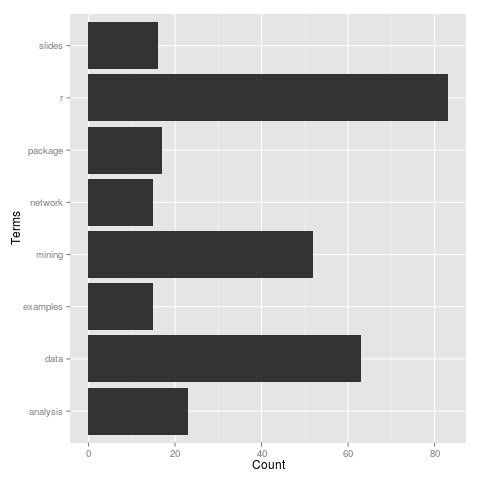

In [54]:
ggplot(df, aes(x=term, y=freq)) + 
    geom_bar(stat = "identity") + 
    xlab("Terms") + ylab("Count") + coord_flip()

## 연관 term 찾기

In [55]:
# which words are associated with 'r' ?
findAssocs(tdm, "r", 0.2)

             r
packages  0.35
users     0.30
canberra  0.26
cran      0.26
many      0.26
card      0.24
functions 0.24
reference 0.24
see       0.24
examples  0.23

In [56]:
# which words are associated with 'mining' ?
findAssocs(tdm, "mining", 0.25)

               mining
data             0.55
mahout           0.39
recommendation   0.39
sets             0.39
supports         0.39
frequent         0.35
itemset          0.34
card             0.29
reference        0.29
functions        0.27
classification   0.26
experience       0.26
lecture          0.26
text             0.26

## 연관 관계 그래프로 그려보기

In [62]:
# source("http://bioconductor.org/biocLite.R")
# bioLite("graph")
# biocLite("Rgraphviz")
library(graph)
library(Rgraphviz)

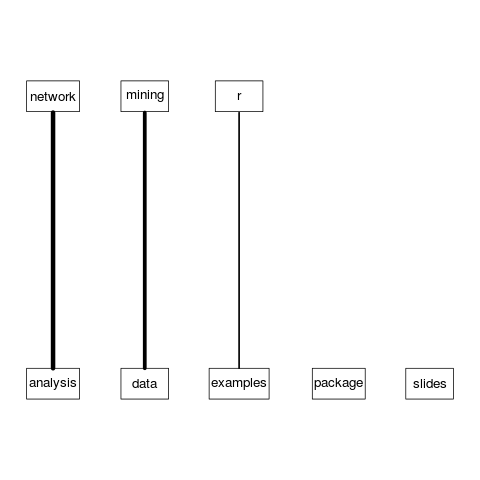

In [63]:
plot(tdm, term=freq.terms, corThreshold=0.12, weighting=T)

# Word Cloud

In [65]:
library(wordcloud)

In [66]:
m <- as.matrix(tdm)

In [67]:
# calcuate the frequency of words and sort it by frquency
word.freq <- sort(rowSums(m), decreasing = T)

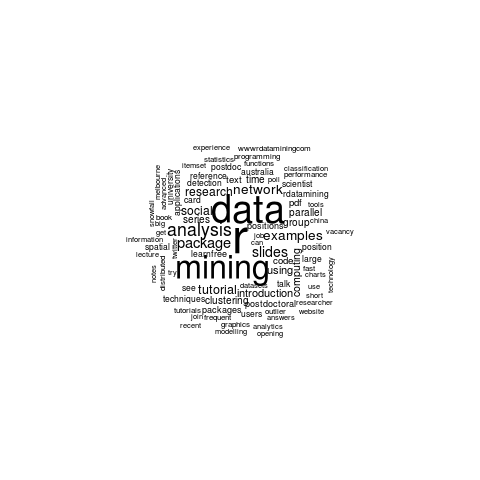

In [68]:
wordcloud(words = names(word.freq), freq=word.freq, min.freq=3, random.order=F)

# Clustering

## 계층적 클러스터링

In [71]:
# remove sparse terms
tdm2 <- removeSparseTerms(tdm, sparse=0.95)
m2 <- as.matrix(tdm2)

In [97]:
str(tdm2)

List of 6
 $ i       : int [1:343] 3 3 11 2 9 10 2 8 9 10 ...
 $ j       : int [1:343] 1 2 2 3 3 3 4 4 4 4 ...
 $ v       : num [1:343] 1 1 1 1 1 1 1 1 1 1 ...
 $ nrow    : int 17
 $ ncol    : int 154
 $ dimnames:List of 2
  ..$ Terms: chr [1:17] "analysis" "computing" "data" "examples" ...
  ..$ Docs : chr [1:154] "1" "2" "3" "4" ...
 - attr(*, "class")= chr [1:2] "TermDocumentMatrix" "simple_triplet_matrix"
 - attr(*, "weighting")= chr [1:2] "term frequency" "tf"


In [72]:
# cluster terms
distMatrix <- dist(scale(m2))

In [75]:
fit <- hclust(distMatrix, method="ward.D2")

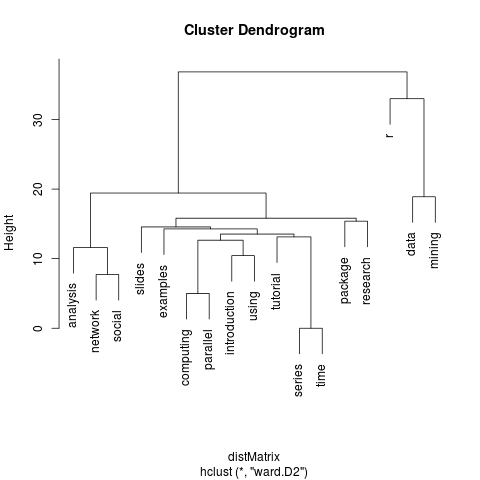

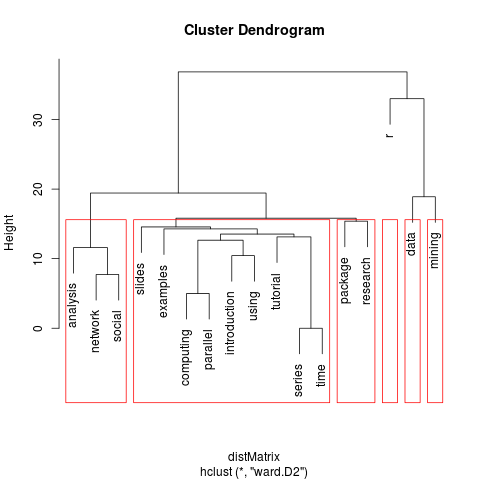

In [77]:
plot(fit)
rect.hclust(fit, k=6)

## K-means 클러스터링

In [79]:
# transpose the matrix to cluster documents (tweets)
m3 <- t(m2)

In [80]:
head(m2)

              Docs
Terms          1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
  analysis     0 0 0 0 0 0 0 0 0  0  0  0  0  0  0  1  0  1  1  1  1  0  0  1
  computing    0 0 1 1 0 1 1 1 1  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0
  data         1 1 0 0 2 0 0 0 0  0  1  2  1  1  1  0  1  0  0  0  0  0  0  0
  examples     0 0 0 0 0 0 0 0 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  introduction 0 0 0 0 0 0 0 0 0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0
  mining       0 0 0 0 0 0 0 0 0  0  0  1  1  0  1  0  0  0  0  0  0  0  0  0
              Docs
Terms          25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45
  analysis      0  0  1  1  1  1  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0
  computing     0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0
  data          0  0  0  1  0  0  0  1  0  0  1  1  0  0  0  0  0  1  0  0  1
  examples      0  0  0  0  0  1  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0
  introduction  0  0  0  0

In [81]:
head(m3)

    Terms
Docs analysis computing data examples introduction mining network package
   1        0         0    1        0            0      0       0       0
   2        0         0    1        0            0      0       0       0
   3        0         1    0        0            0      0       0       0
   4        0         1    0        0            0      0       0       1
   5        0         0    2        0            0      0       0       1
   6        0         1    0        0            0      0       0       0
    Terms
Docs parallel r research series slides social time tutorial using
   1        0 0        0      0      0      0    0        0     0
   2        0 0        1      0      0      0    0        0     0
   3        1 1        0      0      0      0    0        0     0
   4        1 1        0      0      0      0    0        1     1
   5        0 1        0      0      0      0    0        0     1
   6        1 1        0      0      0      0    0        0     1

In [82]:
set.seed(122)
k <- 6 
kmeansResult <- kmeans(m3, k)

In [84]:
str(kmeansResult)

List of 9
 $ cluster     : Named int [1:154] 5 5 4 4 6 4 4 4 4 4 ...
  ..- attr(*, "names")= chr [1:154] "1" "2" "3" "4" ...
 $ centers     : num [1:6, 1:17] 0.1351 0 0.9231 0 0.0423 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:6] "1" "2" "3" "4" ...
  .. ..$ : chr [1:17] "analysis" "computing" "data" "examples" ...
 $ totss       : num 336
 $ withinss    : num [1:6] 48.43 25.88 14.46 5.62 83.63 ...
 $ tot.withinss: num 189
 $ betweenss   : num 147
 $ size        : int [1:6] 37 17 13 8 71 8
 $ iter        : int 3
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


In [83]:
head(kmeansResult)

$cluster
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  5   5   4   4   6   4   4   4   4   4   5   2   5   5   5   3   5   3   3   3 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  3   1   5   3   1   5   3   6   3   3   3   5   1   5   2   2   5   5   5   5 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  4   2   5   5   5   5   5   5   5   5   5   5   5   5   2   5   5   5   5   5 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  5   5   5   1   5   5   1   1   3   5   5   5   1   6   1   5   1   2   5   3 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
  5   1   5   1   1   5   5   5   5   5   1   1   5   1   1   5   5   5   5   1 
101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 
  1   1   5   2   1   2   5   1   6   1   5   1   1   6   5   5   2   1   2   1 
121 122 123 124 125

In [85]:
# cluster centers
round(kmeansResult$centers, digits = 3)

  analysis computing  data examples introduction mining network package
1    0.135     0.000 0.000    0.189        0.027  0.162   0.054   0.135
2    0.000     0.059 1.471    0.118        0.059  1.294   0.000   0.118
3    0.923     0.000 0.000    0.077        0.154  0.077   1.000   0.077
4    0.000     1.000 0.000    0.000        0.000  0.000   0.000   0.125
5    0.042     0.000 0.394    0.042        0.070  0.324   0.000   0.085
6    0.375     0.000 1.250    0.250        0.125  0.000   0.000   0.250
  parallel     r research series slides social  time tutorial using
1    0.000 1.297    0.000  0.108  0.162  0.000 0.108    0.108 0.081
2    0.059 0.941    0.059  0.000  0.059  0.000 0.000    0.000 0.059
3    0.000 0.231    0.077  0.000  0.077  0.769 0.000    0.154 0.077
4    0.750 1.000    0.000  0.000  0.125  0.000 0.000    0.125 0.250
5    0.014 0.000    0.141  0.042  0.085  0.028 0.042    0.085 0.014
6    0.000 1.000    0.000  0.125  0.125  0.000 0.125    0.000 0.250

In [98]:
for (i in 1:k) {
    cat(paste("cluster ", i, ": ", sep = ""))
    s <- sort(kmeansResult$centers[i,], decreasing = T)
    cat(names(s)[1:5], "\n")
}

cluster 1: r examples mining slides analysis 
cluster 2: data mining r examples package 
cluster 3: network analysis social r introduction 
cluster 4: computing r parallel using package 
cluster 5: data mining research package slides 
cluster 6: data r analysis examples package 


## k-medoids clustering

In [100]:
library(fpc)

In [101]:
# partitioning around medoids with estimation of number of clusters
pamResult <- pamk(m3, metric="manhattan")

In [102]:
str(pamResult)

List of 3
 $ pamobject:List of 10
  ..$ medoids   : num [1:10, 1:17] 0 0 0 0 1 0 0 0 0 1 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ Docs : chr [1:10] "32" "9" "109" "133" ...
  .. .. ..$ Terms: chr [1:17] "analysis" "computing" "data" "examples" ...
  ..$ id.med    : int [1:10] 32 9 109 133 27 147 150 151 142 128
  ..$ clustering: Named int [1:154] 1 1 2 2 3 2 2 2 2 2 ...
  .. ..- attr(*, "names")= chr [1:154] "1" "2" "3" "4" ...
  ..$ objective : Named num [1:2] 1.01 1.01
  .. ..- attr(*, "names")= chr [1:2] "build" "swap"
  ..$ isolation : Factor w/ 3 levels "no","L","L*": 1 1 1 1 1 1 1 1 1 1
  .. ..- attr(*, "names")= chr [1:10] "1" "2" "3" "4" ...
  ..$ clusinfo  : num [1:10, 1:5] 11 9 8 26 13 25 36 13 9 4 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : NULL
  .. .. ..$ : chr [1:5] "size" "max_diss" "av_diss" "diameter" ...
  ..$ silinfo   :List of 3
  .. ..$ widths         : num [1:154, 1:3] 1 1 1 1 1 1 1 1 1 1 ...
  .. .. ..- attr(*, "dimnames")=List of 2
  .

In [104]:
# number of clusters identified
k <- pamResult$nc
k

[1] 10

In [106]:
pamResult <- pamResult$pamobject

In [107]:
pamResult

Medoids:
     ID analysis computing data examples introduction mining network package
32   32        0         0    1        0            0      0       0       0
9     9        0         1    0        0            0      0       0       0
109 109        0         0    1        0            0      0       0       0
133 133        0         0    1        0            0      1       0       0
27   27        1         0    0        0            0      0       1       0
147 147        0         0    0        0            0      0       0       0
150 150        0         0    0        0            0      0       0       0
151 151        0         0    1        0            0      1       0       0
142 142        0         0    0        0            0      0       0       0
128 128        1         0    0        0            0      1       0       0
    parallel r research series slides social time tutorial using
32         0 0        0      0      0      0    0        0     0
9          1 1

In [109]:
for(i in 1:k) {
    cat("cluster", i, ": ", 
        colnames(pamResult$medoids)[which(pamResult$medoids[i, ]==1)], "\n")
}

cluster 1 :  data 
cluster 2 :  computing parallel r 
cluster 3 :  data r 
cluster 4 :  data mining 
cluster 5 :  analysis network social 
cluster 6 :  r 
cluster 7 :   
cluster 8 :  data mining r 
cluster 9 :   
cluster 10 :  analysis mining series time 


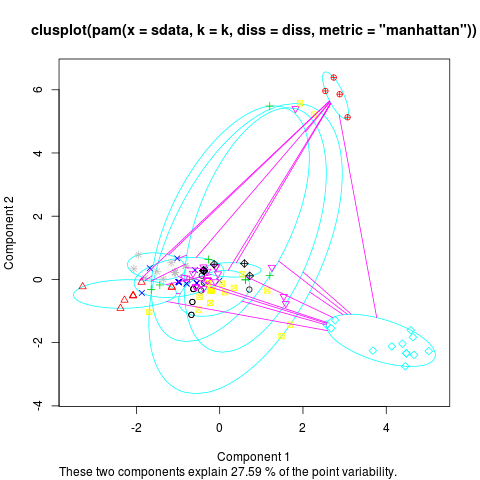

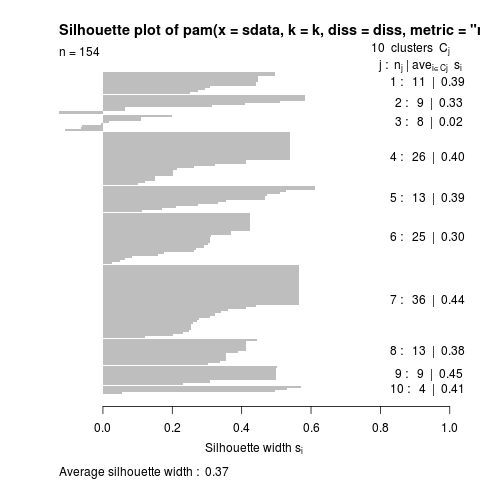

In [110]:
plot(pamResult, col.p=pamResult$clustering)

# Topic Modeling

In [155]:
dtm <- as.DocumentTermMatrix(tdm)

In [156]:
dtm

<<DocumentTermMatrix (documents: 154, terms: 582)>>
Non-/sparse entries: 1191/88437
Sparsity           : 99%
Maximal term length: 27
Weighting          : term frequency (tf)

In [157]:
str(dtm)

List of 6
 $ i       : int [1:1191] 1 1 1 1 1 1 2 2 2 2 ...
 $ j       : int [1:1191] 47 105 321 372 375 437 105 372 385 394 ...
 $ v       : num [1:1191] 1 1 1 1 1 1 1 1 1 1 ...
 $ nrow    : int 154
 $ ncol    : int 582
 $ dimnames:List of 2
  ..$ Docs : chr [1:154] "1" "2" "3" "4" ...
  ..$ Terms: chr [1:582] "\034big" "access" "accessible" "acm" ...
 - attr(*, "class")= chr [1:2] "DocumentTermMatrix" "simple_triplet_matrix"
 - attr(*, "weighting")= chr [1:2] "term frequency" "tf"


In [158]:
# install.packages("topicmodels")
library(topicmodels)
library(data.table) # as.IDate 를 쓰기 위해

In [159]:
# find 8 topics
lda <- LDA(dtm, k = 8) 

In [160]:
str(lda)

Formal class 'LDA_VEM' [package "topicmodels"] with 14 slots
  ..@ alpha          : num 0.0334
  ..@ call           : language LDA(x = dtm, k = 8)
  ..@ Dim            : int [1:2] 154 582
  ..@ control        :Formal class 'LDA_VEMcontrol' [package "topicmodels"] with 13 slots
  .. .. ..@ estimate.alpha: logi TRUE
  .. .. ..@ alpha         : num 6.25
  .. .. ..@ seed          : int 1427282533
  .. .. ..@ verbose       : int 0
  .. .. ..@ prefix        : chr "/tmp/Rtmp21ViJ1/file6c567cde9be4"
  .. .. ..@ save          : int 0
  .. .. ..@ nstart        : int 1
  .. .. ..@ best          : logi TRUE
  .. .. ..@ keep          : int 0
  .. .. ..@ estimate.beta : logi TRUE
  .. .. ..@ var           :Formal class 'OPTcontrol' [package "topicmodels"] with 2 slots
  .. .. .. .. ..@ iter.max: int 500
  .. .. .. .. ..@ tol     : num 1e-06
  .. .. ..@ em            :Formal class 'OPTcontrol' [package "topicmodels"] with 2 slots
  .. .. .. .. ..@ iter.max: int 1000
  .. .. .. .. ..@ tol     : num 1e

In [161]:
# first 4 terms of every topic
term <- terms(lda, 4) 
term

     Topic 1    Topic 2   Topic 3  Topic 4    Topic 5       Topic 6       
[1,] "network"  "mining"  "data"   "r"        "r"           "r"           
[2,] "analysis" "data"    "mining" "tutorial" "data"        "data"        
[3,] "social"   "text"    "free"   "learn"    "package"     "examples"    
[4,] "research" "itemset" "r"      "advanced" "programming" "introduction"
     Topic 7  Topic 8   
[1,] "r"      "r"       
[2,] "group"  "data"    
[3,] "series" "mining"  
[4,] "time"   "parallel"

In [162]:
# first topic identified for every document (tweet)

In [163]:
term <- apply(term, MARGIN=2, paste, collapse=", ") # 그래프에 보기 좋게 하려고

In [164]:
term

                              Topic 1                               Topic 2 
"network, analysis, social, research"         "mining, data, text, itemset" 
                              Topic 3                               Topic 4 
              "data, mining, free, r"        "r, tutorial, learn, advanced" 
                              Topic 5                               Topic 6 
      "r, data, package, programming"     "r, data, examples, introduction" 
                              Topic 7                               Topic 8 
             "r, group, series, time"           "r, data, mining, parallel" 

In [165]:
topic <- topics(lda, 1)
str(topic)

 Named int [1:154] 2 1 8 8 6 8 8 8 4 4 ...
 - attr(*, "names")= chr [1:154] "1" "2" "3" "4" ...


In [166]:
topics <- data.frame(date=as.IDate(tweets.df$created), topic)
head(topics)

        date topic
1 2012-04-14     2
2 2012-04-14     1
3 2012-04-14     8
4 2012-04-14     8
5 2012-04-14     6
6 2012-04-12     8

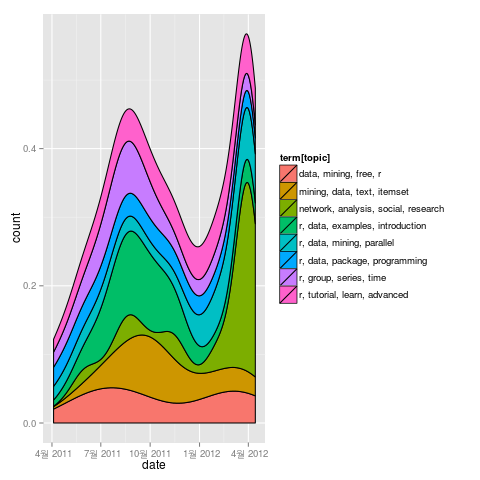

In [174]:
qplot(date, ..count.., data=topics, geom="density", fill=term[topic], position="stack")

# 참고자료

* [1] Text Mining with R : an Analysis of Twitter Data - http://www.slideshare.net/rdatamining/text-mining-with-r-an-analysis-of-twitter-data